In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_174' 'bien_230' 'bien_241' 'bien_288' 'bien_295' 'bien_337'
 'bien_39' 'bien_416' 'bien_561' 'bien_626' 'comer_144' 'comer_164'
 'comer_248' 'comer_313' 'comer_412' 'comer_422' 'comer_475' 'comer_625'
 'comer_712' 'comer_747' 'cuánto_405' 'cuánto_420' 'cuánto_445'
 'cuánto_448' 'cuánto_456' 'cuánto_460' 'cuánto_468' 'cuánto_483'
 'cuánto_703' 'cuánto_742' 'cómo_12' 'cómo_171' 'cómo_223' 'cómo_230'
 'cómo_379' 'cómo_427' 'cómo_44' 'cómo_85' 'cómo_9' 'cómo_90' 'dentro_241'
 'dentro_369' 'dentro_457' 'dentro_532' 'dentro_55' 'dentro_627'
 'dentro_647' 'dentro_664' 'dentro_692' 'dentro_73' 'emoción_143'
 'emoción_145' 'emoción_188' 'emoción_249' 'emoción_250' 'emoción_286'
 'emoción_43' 'emoción_54' 'emoción_71' 'emoción_93' 'fuerte_153'
 'fuerte_310' 'fuerte_314' 'fuerte_361' 'fuerte_362' 'fuerte_363'
 'fuerte_372' 'fuerte_459' 'fuerte_5

In [48]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_174','bien_230','bien_241','bien_288','bien_295','bien_337'
,'bien_39','bien_416','bien_561','bien_626','comer_144','comer_164'
,'comer_248','comer_313','comer_412','comer_422','comer_475','comer_625'
,'comer_712','comer_747','cuánto_405','cuánto_420','cuánto_445'
,'cuánto_448','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_742','cómo_12','cómo_171','cómo_223','cómo_230'
,'cómo_379','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','dentro_241'
,'dentro_369','dentro_457','dentro_532','dentro_55','dentro_627'
,'dentro_647','dentro_664','dentro_692','dentro_73','emoción_143'
,'emoción_145','emoción_188','emoción_249','emoción_250','emoción_286'
,'emoción_43','emoción_54','emoción_71','emoción_93','fuerte_153'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_571','fuerte_588','pensar_235'
,'pensar_450','pensar_461','pensar_600','pensar_613','pensar_623'
,'pensar_640','pensar_66','pensar_771','pensar_97','sentir_14'
,'sentir_149','sentir_16','sentir_38','sentir_458','sentir_53'
,'sentir_547','sentir_602','sentir_604','sentir_89','sí_159','sí_194'
,'sí_200','sí_278','sí_291','sí_306','sí_359','sí_419','sí_633','sí_659'
,'tú_205','tú_207','tú_229','tú_247','tú_277','tú_635','tú_691','tú_80'
,'tú_803','tú_96','yo_113','yo_119','yo_121','yo_125','yo_140','yo_152'
,'yo_164','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])


In [49]:
temp_10_10inst

temp_10_10inst_w1 = temp_10_10inst[~temp_10_10inst.classes.str.startswith('bien')]

temp_10_10inst_w2 = temp_10_10inst_w1[~temp_10_10inst_w1.classes.str.startswith('cuánto')]

temp_10_10inst_w3 = temp_10_10inst_w2[~temp_10_10inst_w2.classes.str.startswith('cómo')]

temp_10_10inst_w4 = temp_10_10inst_w3[~temp_10_10inst_w3.classes.str.startswith('dentro')]

temp_10_10inst_w5 = temp_10_10inst_w4[~temp_10_10inst_w4.classes.str.startswith('emoción')]
temp_10_10inst_w6 = temp_10_10inst_w5[~temp_10_10inst_w5.classes.str.startswith('fuerte')]
temp_10_10inst_w7 = temp_10_10inst_w6[~temp_10_10inst_w6.classes.str.startswith('sí')]
temp_10_10inst_w8 = temp_10_10inst_w7[~temp_10_10inst_w7.classes.str.startswith('tú')]
temp_10_10inst_w9 = temp_10_10inst_w8[~temp_10_10inst_w8.classes.str.startswith('yo')]

In [50]:
temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,classes
0,aprender_175,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,...,0.711247,0.265011,0.616345,0.206288,0.619600,0.193010,0.575766,0.216091,0.569957,aprender
1,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,0.593835,0.717371,0.273257,0.725650,0.203608,0.691391,0.187500,0.682232,0.215004,aprender
2,aprender_195,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,...,0.660586,0.365322,0.592418,0.316429,0.612745,0.295847,0.586953,0.318972,0.577937,aprender
3,aprender_217,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,...,0.623457,0.452110,0.448878,0.396107,0.399155,0.361584,0.365836,0.379465,0.378608,aprender
4,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.585232,0.670107,0.265102,0.663198,0.206352,0.617142,0.187647,0.620610,0.215813,aprender


In [51]:
verbs_dataset_10_10inst = temp_10_10inst_w9.iloc[:,1:462]

In [52]:
new_verbs_dataset_10_10inst = temp_10_10inst_w9.iloc[:,1:461]

In [53]:
verbs_dataset_10_10inst = verbs_dataset_10_10inst.T.iloc[:460,:]

In [54]:
verbs_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.483805,0.476822,0.467994,0.491592,0.491603,0.554098,0.511178,0.491625,0.500354,0.510462
1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.49226,0.533556,0.525905,...,0.51686,0.511006,0.486192,0.501808,0.519648,0.584634,0.546053,0.520118,0.530162,0.519526
2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.54548,0.539205,...,0.535002,0.530216,0.495588,0.513359,0.53761,0.601425,0.564387,0.537352,0.544667,0.53007
3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.553158,0.547931,0.508684,0.526012,0.551627,0.615787,0.57682,0.552286,0.562612,0.539912
4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.458494,0.456908,0.440813,0.462897,0.465835,0.537598,0.487959,0.473124,0.471165,0.478172


In [55]:
verbs_dataset_10_10inst.columns = ['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'comer_144','comer_164','comer_248','comer_313','comer_412','comer_422'
,'comer_475','comer_625','comer_712','comer_747','pensar_235','pensar_450'
,'pensar_461','pensar_600','pensar_613','pensar_623','pensar_640'
,'pensar_66','pensar_771','pensar_97','sentir_14','sentir_149','sentir_16'
,'sentir_38','sentir_458','sentir_53','sentir_547','sentir_602'
,'sentir_604','sentir_89']

In [56]:
verbs_dataset_10_10inst_features =['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459']

In [57]:
verbs_dataset_10_10inst['features'] = verbs_dataset_10_10inst_features

verbs_dataset_10_10inst.set_index('features',inplace = True)

In [58]:
verbs_dataset_10_10inst.head()

,aprender_175,aprender_18,aprender_195,aprender_217,aprender_27,aprender_282,aprender_34,aprender_35,aprender_7,aprender__466,...,sentir_14,sentir_149,sentir_16,sentir_38,sentir_458,sentir_53,sentir_547,sentir_602,sentir_604,sentir_89
features,,,,,,,,,,,,,,,,,,,,,
feature_0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.483805,0.476822,0.467994,0.491592,0.491603,0.554098,0.511178,0.491625,0.500354,0.510462
feature_1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.49226,0.533556,0.525905,...,0.51686,0.511006,0.486192,0.501808,0.519648,0.584634,0.546053,0.520118,0.530162,0.519526
feature_2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.54548,0.539205,...,0.535002,0.530216,0.495588,0.513359,0.53761,0.601425,0.564387,0.537352,0.544667,0.53007
feature_3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.553158,0.547931,0.508684,0.526012,0.551627,0.615787,0.57682,0.552286,0.562612,0.539912
feature_4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.458494,0.456908,0.440813,0.462897,0.465835,0.537598,0.487959,0.473124,0.471165,0.478172


In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_verbs = preprocessing.scale(verbs_dataset_10_10inst.T)

In [60]:
pca_verbs = PCA()
pca_verbs.fit(scaled_data_verbs)
pca_data_verbs = pca_verbs.transform(scaled_data_verbs)

In [61]:
per_var_verbs = np.round(pca_verbs.explained_variance_ratio_* 100 , decimals = 1)
labels_verbs = ['PC' + str(x) for x in range(1 , len(per_var_verbs) +1)]

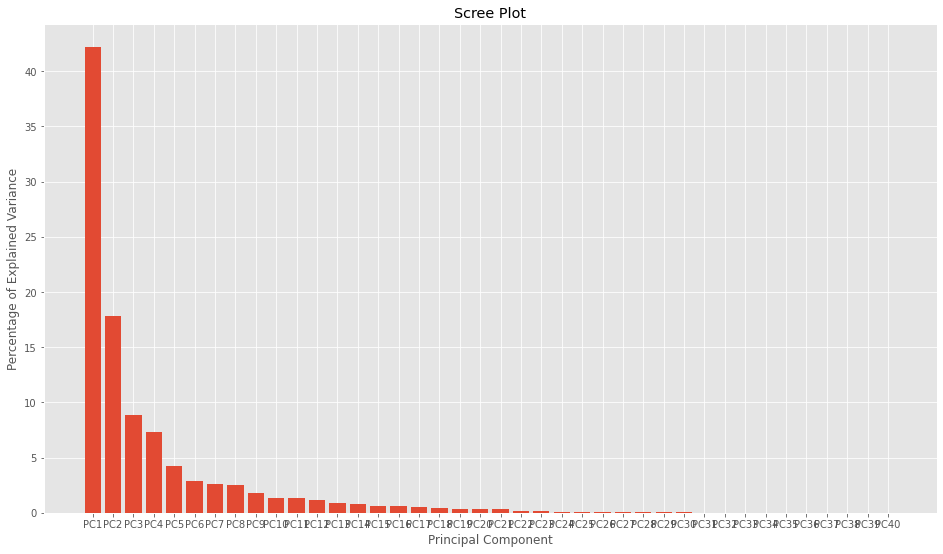

In [62]:
plt.bar(x=range(1, len(per_var_verbs) + 1 ), height = per_var_verbs, tick_label = labels_verbs)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [63]:

#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_verbs_verbs = pd.DataFrame(pca_data_verbs, index = verbs_dataset_10_10inst.columns , columns = labels_verbs)

In [64]:
# Loading scores for PC1

loading_scores_verbs  = pd.Series(pca_verbs.components_[0], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC1_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC1_df_verbs = PC1_loading_scores_verbs.to_frame()
PC1_df_verbs = PC1_df_verbs.rename(columns={0: 'Col_1'})
PC1_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_verbs  = pd.Series(pca_verbs.components_[1], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC2_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC2_df_verbs = PC2_loading_scores_verbs.to_frame()
PC2_df_verbs = PC2_df_verbs.rename(columns={0: 'Col_1'})
PC2_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_verbs  = pd.Series(pca_verbs.components_[2], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC3_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

##############

PC3_df_verbs = PC3_loading_scores_verbs.to_frame()
PC3_df_verbs = PC3_df_verbs.rename(columns={0: 'Col_1'})
PC3_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC4


loading_scores_verbs  = pd.Series(pca_verbs.components_[3], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC4_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

##############

PC4_df_verbs = PC4_loading_scores_verbs.to_frame()
PC4_df_verbs = PC4_df_verbs.rename(columns={0: 'Col_1'})
PC4_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_verbs  = pd.Series(pca_verbs.components_[4], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC5_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC5_df_verbs = PC5_loading_scores_verbs.to_frame()
PC5_df_verbs = PC5_df_verbs.rename(columns={0: 'Col_1'})
PC5_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC6

loading_scores_verbs  = pd.Series(pca_verbs.components_[5], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC6_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC6_df_verbs = PC6_loading_scores_verbs.to_frame()
PC6_df_verbs = PC6_df_verbs.rename(columns={0: 'Col_1'})
PC6_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC7

loading_scores_verbs  = pd.Series(pca_verbs.components_[6], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC7_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC7_df_verbs = PC7_loading_scores_verbs.to_frame()
PC7_df_verbs = PC7_df_verbs.rename(columns={0: 'Col_1'})
PC7_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC8


loading_scores_verbs  = pd.Series(pca_verbs.components_[7], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC8_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC8_df_verbs = PC8_loading_scores_verbs.to_frame()
PC8_df_verbs = PC8_df_verbs.rename(columns={0: 'Col_1'})
PC8_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC9


loading_scores_verbs  = pd.Series(pca_verbs.components_[8], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC9_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]


PC9_df_verbs = PC9_loading_scores_verbs.to_frame()
PC9_df_verbs = PC9_df_verbs.rename(columns={0: 'Col_1'})
PC9_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC10


loading_scores_verbs  = pd.Series(pca_verbs.components_[9], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC10_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC10_df_verbs = PC10_loading_scores_verbs.to_frame()
PC10_df_verbs = PC10_df_verbs.rename(columns={0: 'Col_1'})
PC10_df_verbs.reset_index(level=0, inplace=True)





In [65]:
PCA_10components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs).append(PC7_df_verbs).append(PC8_df_verbs).append(PC9_df_verbs).append(PC10_df_verbs)

dic = {}
for i in range(100):
    x = list(PCA_10components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

{'feature_353': 1,
 'feature_330': 1,
 'feature_334': 1,
 'feature_376': 1,
 'feature_357': 1,
 'feature_380': 1,
 'feature_307': 1,
 'feature_402': 1,
 'feature_311': 1,
 'feature_425': 1,
 'feature_30': 1,
 'feature_72': 1,
 'feature_95': 1,
 'feature_49': 1,
 'feature_71': 1,
 'feature_94': 1,
 'feature_48': 1,
 'feature_53': 1,
 'feature_26': 1,
 'feature_118': 1,
 'feature_89': 1,
 'feature_87': 1,
 'feature_91': 1,
 'feature_66': 1,
 'feature_68': 1,
 'feature_64': 1,
 'feature_202': 1,
 'feature_225': 1,
 'feature_112': 1,
 'feature_114': 1,
 'feature_38': 1,
 'feature_40': 1,
 'feature_44': 1,
 'feature_42': 1,
 'feature_61': 1,
 'feature_84': 1,
 'feature_63': 1,
 'feature_130': 1,
 'feature_132': 1,
 'feature_86': 1,
 'feature_83': 2,
 'feature_106': 2,
 'feature_221': 1,
 'feature_174': 3,
 'feature_60': 2,
 'feature_129': 2,
 'feature_151': 3,
 'feature_198': 1,
 'feature_152': 2,
 'feature_128': 2,
 'feature_275': 1,
 'feature_271': 1,
 'feature_273': 1,
 'feature_269': 1,

In [66]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

In [67]:
projection_verbs = pca_verbs.transform(X=new_verbs_dataset_10_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'],
    index   = new_verbs_dataset_10_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,0.051256,-7.218339,-2.279806,-4.567571,-1.346633,-2.411538,-0.670098,-3.212820,-1.557499,0.320406,...,-0.108553,-0.155126,0.183501,0.290783,-0.131327,-0.247757,0.179111,0.285321,-0.413625,-0.172528
1,-1.845160,-7.401149,-2.428011,-4.396505,-2.190876,-2.389325,-1.616070,-3.034192,-0.981898,1.147218,...,-0.484749,0.123688,0.080302,0.122947,-0.103912,-0.269844,0.356321,0.547734,-0.390802,-0.134214
2,0.329963,-7.064764,-1.928069,-4.293082,-1.424849,-2.330172,-0.389436,-2.987516,-1.640125,0.129129,...,-0.171683,-0.165139,0.071177,0.261604,-0.156380,-0.255003,0.187317,0.270819,-0.370220,-0.157891
3,-0.446060,-7.404865,-1.234704,-3.465663,-1.088086,-2.343163,-0.848954,-2.870131,-1.542484,0.410545,...,-0.224632,-0.095393,0.124758,0.180365,-0.085902,-0.237948,0.159289,0.344317,-0.336960,-0.145042
4,-1.955217,-7.503319,-2.251891,-4.208917,-1.847371,-2.408101,-1.604075,-2.934902,-1.058149,0.964843,...,-0.401058,0.009733,0.129992,0.149896,-0.121888,-0.247639,0.315022,0.566908,-0.418839,-0.113723


In [68]:
PC6_10_10inst_verbs = projection_verbs.iloc[:,0:6]
PC6_10_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.051256,-7.218339,-2.279806,-4.567571,-1.346633,-2.411538
1,-1.845160,-7.401149,-2.428011,-4.396505,-2.190876,-2.389325
2,0.329963,-7.064764,-1.928069,-4.293082,-1.424849,-2.330172
3,-0.446060,-7.404865,-1.234704,-3.465663,-1.088086,-2.343163
4,-1.955217,-7.503319,-2.251891,-4.208917,-1.847371,-2.408101


In [69]:
PC6_10_10inst_verbs.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'comer_144','comer_164','comer_248','comer_313','comer_412','comer_422'
,'comer_475','comer_625','comer_712','comer_747','pensar_235','pensar_450'
,'pensar_461','pensar_600','pensar_613','pensar_623','pensar_640'
,'pensar_66','pensar_771','pensar_97','sentir_14','sentir_149','sentir_16'
,'sentir_38','sentir_458','sentir_53','sentir_547','sentir_602'
,'sentir_604','sentir_89'],True)

In [70]:
PC6_10_10inst_verbs['classes'] = PC6_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
PC6_10_10inst_verbs.drop("instance", axis=1, inplace=True)

PC6_10_10inst_verbs.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,0.051256,-7.218339,-2.279806,-4.567571,-1.346633,-2.411538,aprender
1,-1.845160,-7.401149,-2.428011,-4.396505,-2.190876,-2.389325,aprender
2,0.329963,-7.064764,-1.928069,-4.293082,-1.424849,-2.330172,aprender
3,-0.446060,-7.404865,-1.234704,-3.465663,-1.088086,-2.343163,aprender
4,-1.955217,-7.503319,-2.251891,-4.208917,-1.847371,-2.408101,aprender


In [72]:
print(pd.unique(PC6_10_10inst_verbs['classes']))

X_PC6_10_10inst_verbs= PC6_10_10inst_verbs.iloc[:,:-1].values
y_PC6_10_10inst_verbs=  PC6_10_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'pensar' 'sentir']


In [73]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_verbs== Labelencoder_Y.fit_transform(y_PC6_10_10inst_verbs)
y_PC6_10_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'pensar', 'pensar', 'pensar', 'pensar',
       'pensar', 'pensar', 'pensar', 'pensar', 'pensar', 'pensar',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir'], dtype=object)

In [74]:
X_train_PC6_10_10inst_verbs, X_test_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs = train_test_split(X_PC6_10_10inst_verbs, y_PC6_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_verbs = scaler.fit_transform(X_train_PC6_10_10inst_verbs)
X_test_PC6_10_10inst_verbs = scaler.transform(X_test_PC6_10_10inst_verbs)

([<matplotlib.axis.XTick at 0x1bcbb5b2c08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

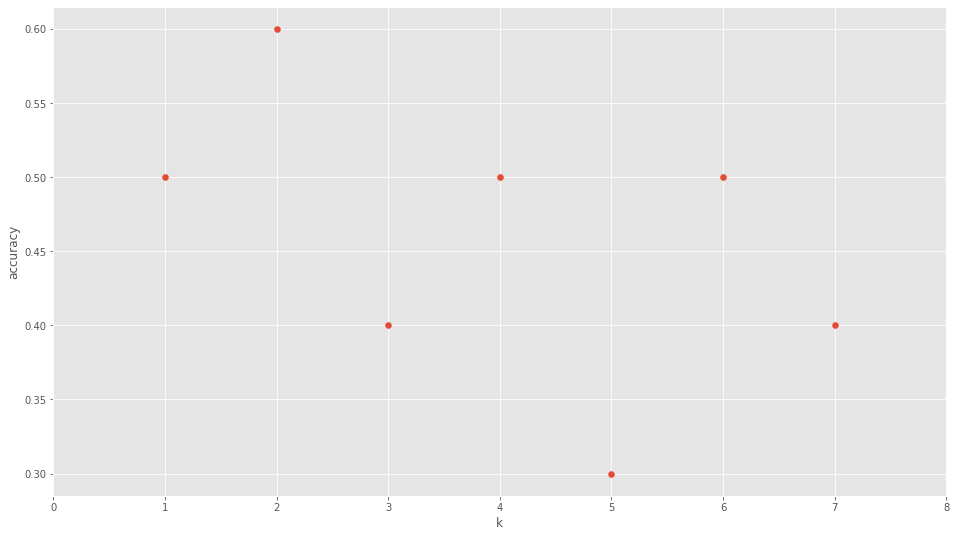

In [75]:
k_range_PC6_10_10inst_verbs = range(1, 8)
scores_PC6_10_10inst_verbs = []
for k in k_range_PC6_10_10inst_verbs:
    knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
    scores_PC6_10_10inst_verbs.append(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_verbs, scores_PC6_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.50


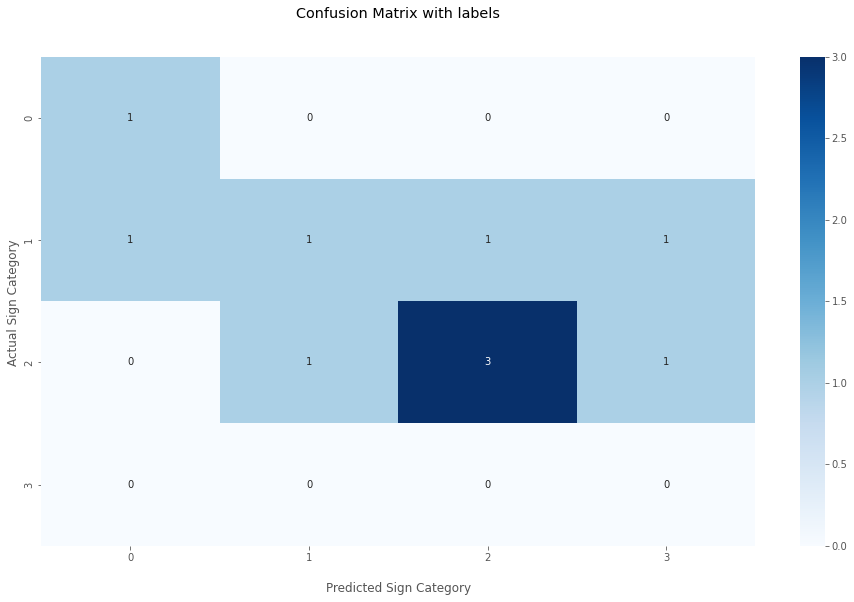

In [76]:
n_neighbors_PC6_10_10inst_verbs = 1
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on test set: 0.60


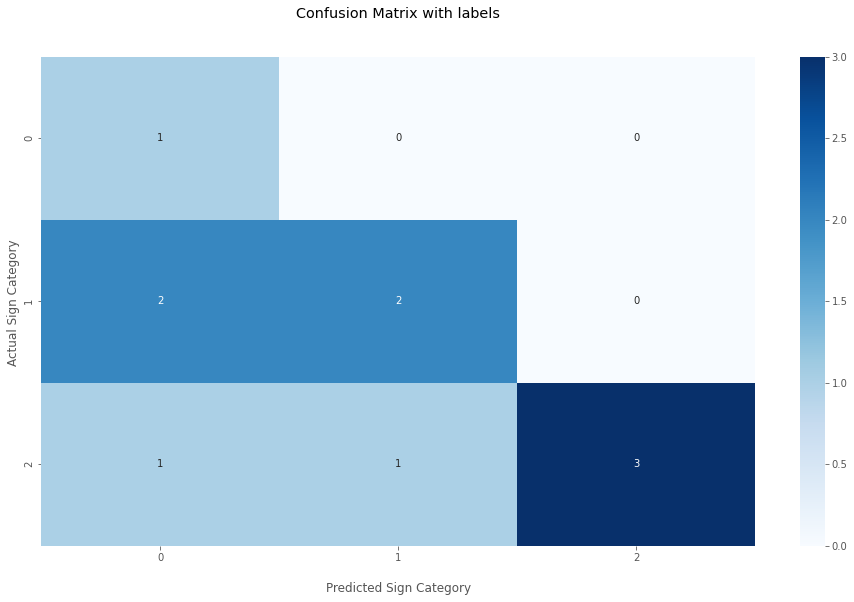

In [77]:
n_neighbors_PC6_10_10inst_verbs = 2
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.40


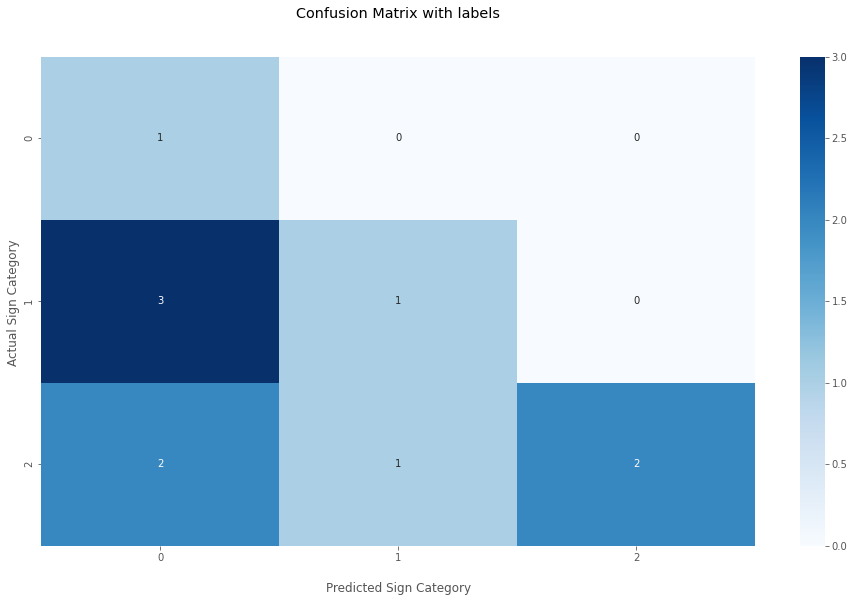

In [78]:
n_neighbors_PC6_10_10inst_verbs = 3
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.30


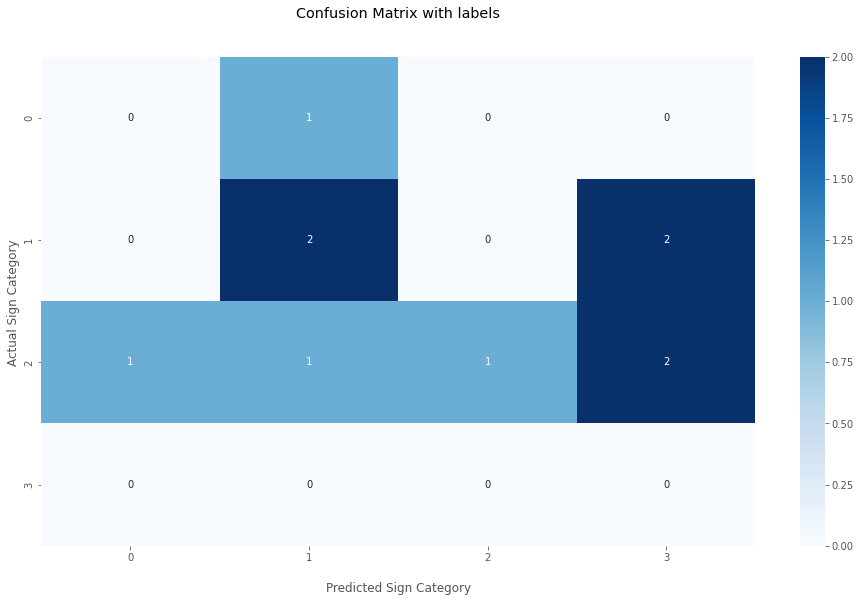

In [79]:
n_neighbors_PC6_10_10inst_verbs = 5
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [80]:
PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs)

dic = {}
for i in range(60):
    x = list(PCA_6components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
dic

{'feature_353': 1,
 'feature_330': 1,
 'feature_334': 1,
 'feature_376': 1,
 'feature_357': 1,
 'feature_380': 1,
 'feature_307': 1,
 'feature_402': 1,
 'feature_311': 1,
 'feature_425': 1,
 'feature_30': 1,
 'feature_72': 1,
 'feature_95': 1,
 'feature_49': 1,
 'feature_71': 1,
 'feature_94': 1,
 'feature_48': 1,
 'feature_53': 1,
 'feature_26': 1,
 'feature_118': 1,
 'feature_89': 1,
 'feature_87': 1,
 'feature_91': 1,
 'feature_66': 1,
 'feature_68': 1,
 'feature_64': 1,
 'feature_202': 1,
 'feature_225': 1,
 'feature_112': 1,
 'feature_114': 1,
 'feature_38': 1,
 'feature_40': 1,
 'feature_44': 1,
 'feature_42': 1,
 'feature_61': 1,
 'feature_84': 1,
 'feature_63': 1,
 'feature_130': 1,
 'feature_132': 1,
 'feature_86': 1,
 'feature_83': 1,
 'feature_106': 1,
 'feature_221': 1,
 'feature_174': 1,
 'feature_60': 1,
 'feature_129': 1,
 'feature_151': 1,
 'feature_198': 1,
 'feature_152': 1,
 'feature_128': 1,
 'feature_275': 1,
 'feature_271': 1,
 'feature_273': 1,
 'feature_269': 1,

In [81]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################

projection_verbs = pca_verbs.transform(X=new_verbs_dataset_10_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'],
    index   = new_verbs_dataset_10_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,0.051256,-7.218339,-2.279806,-4.567571,-1.346633,-2.411538,-0.670098,-3.212820,-1.557499,0.320406,...,-0.108553,-0.155126,0.183501,0.290783,-0.131327,-0.247757,0.179111,0.285321,-0.413625,-0.172528
1,-1.845160,-7.401149,-2.428011,-4.396505,-2.190876,-2.389325,-1.616070,-3.034192,-0.981898,1.147218,...,-0.484749,0.123688,0.080302,0.122947,-0.103912,-0.269844,0.356321,0.547734,-0.390802,-0.134214
2,0.329963,-7.064764,-1.928069,-4.293082,-1.424849,-2.330172,-0.389436,-2.987516,-1.640125,0.129129,...,-0.171683,-0.165139,0.071177,0.261604,-0.156380,-0.255003,0.187317,0.270819,-0.370220,-0.157891
3,-0.446060,-7.404865,-1.234704,-3.465663,-1.088086,-2.343163,-0.848954,-2.870131,-1.542484,0.410545,...,-0.224632,-0.095393,0.124758,0.180365,-0.085902,-0.237948,0.159289,0.344317,-0.336960,-0.145042
4,-1.955217,-7.503319,-2.251891,-4.208917,-1.847371,-2.408101,-1.604075,-2.934902,-1.058149,0.964843,...,-0.401058,0.009733,0.129992,0.149896,-0.121888,-0.247639,0.315022,0.566908,-0.418839,-0.113723


In [82]:
PC10_10_10inst_verbs = projection_verbs.iloc[:,0:10]
PC10_10_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.051256,-7.218339,-2.279806,-4.567571,-1.346633,-2.411538,-0.670098,-3.212820,-1.557499,0.320406
1,-1.845160,-7.401149,-2.428011,-4.396505,-2.190876,-2.389325,-1.616070,-3.034192,-0.981898,1.147218
2,0.329963,-7.064764,-1.928069,-4.293082,-1.424849,-2.330172,-0.389436,-2.987516,-1.640125,0.129129
3,-0.446060,-7.404865,-1.234704,-3.465663,-1.088086,-2.343163,-0.848954,-2.870131,-1.542484,0.410545
4,-1.955217,-7.503319,-2.251891,-4.208917,-1.847371,-2.408101,-1.604075,-2.934902,-1.058149,0.964843


In [83]:
PC10_10_10inst_verbs.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'comer_144','comer_164','comer_248','comer_313','comer_412','comer_422'
,'comer_475','comer_625','comer_712','comer_747','pensar_235','pensar_450'
,'pensar_461','pensar_600','pensar_613','pensar_623','pensar_640'
,'pensar_66','pensar_771','pensar_97','sentir_14','sentir_149','sentir_16'
,'sentir_38','sentir_458','sentir_53','sentir_547','sentir_602'
,'sentir_604','sentir_89'],True)

In [84]:
PC10_10_10inst_verbs['classes'] = PC10_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
PC10_10_10inst_verbs.drop("instance", axis=1, inplace=True)

PC10_10_10inst_verbs.head()

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,0.051256,-7.218339,-2.279806,-4.567571,-1.346633,-2.411538,-0.670098,-3.212820,-1.557499,0.320406,aprender
1,-1.845160,-7.401149,-2.428011,-4.396505,-2.190876,-2.389325,-1.616070,-3.034192,-0.981898,1.147218,aprender
2,0.329963,-7.064764,-1.928069,-4.293082,-1.424849,-2.330172,-0.389436,-2.987516,-1.640125,0.129129,aprender
3,-0.446060,-7.404865,-1.234704,-3.465663,-1.088086,-2.343163,-0.848954,-2.870131,-1.542484,0.410545,aprender
4,-1.955217,-7.503319,-2.251891,-4.208917,-1.847371,-2.408101,-1.604075,-2.934902,-1.058149,0.964843,aprender


In [86]:
print(pd.unique(PC10_10_10inst_verbs['classes']))

X_PC10_10_10inst_verbs= PC10_10_10inst_verbs.iloc[:,:-1].values
y_PC10_10_10inst_verbs=  PC10_10_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'pensar' 'sentir']


In [87]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_verbs== Labelencoder_Y.fit_transform(y_PC10_10_10inst_verbs)
y_PC10_10_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'pensar', 'pensar', 'pensar', 'pensar',
       'pensar', 'pensar', 'pensar', 'pensar', 'pensar', 'pensar',
       'sentir', 'sentir', 'sentir', 'sentir', 'sentir', 'sentir',
       'sentir', 'sentir', 'sentir', 'sentir'], dtype=object)

In [88]:
X_train_PC10_10_10inst_verbs, X_test_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs = train_test_split(X_PC10_10_10inst_verbs, y_PC10_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_verbs = scaler.fit_transform(X_train_PC10_10_10inst_verbs)
X_test_PC10_10_10inst_verbs = scaler.transform(X_test_PC10_10_10inst_verbs)

([<matplotlib.axis.XTick at 0x1bcb719ec48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

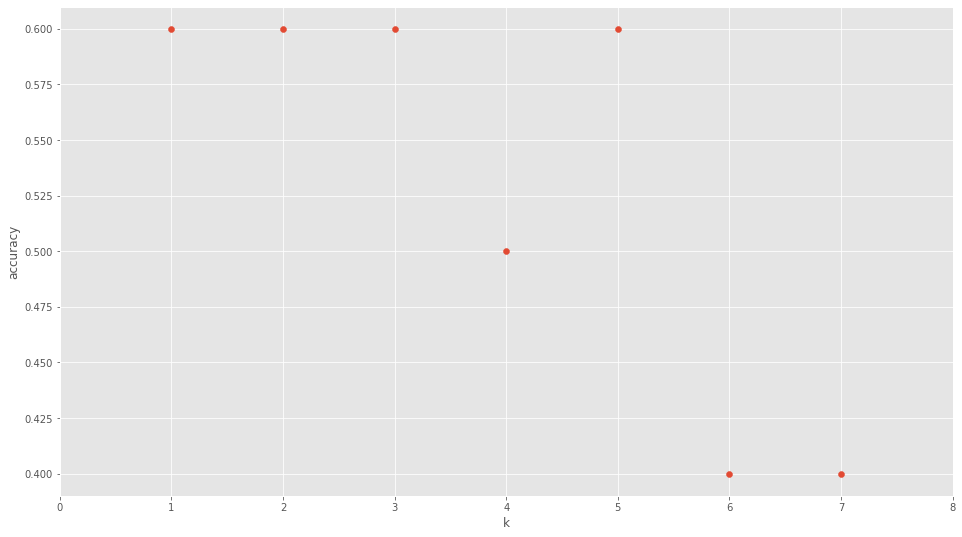

In [89]:
k_range_PC10_10_10inst_verbs = range(1, 8)
scores_PC10_10_10inst_verbs = []
for k in k_range_PC10_10_10inst_verbs:
    knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
    scores_PC10_10_10inst_verbs.append(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_verbs, scores_PC10_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.60


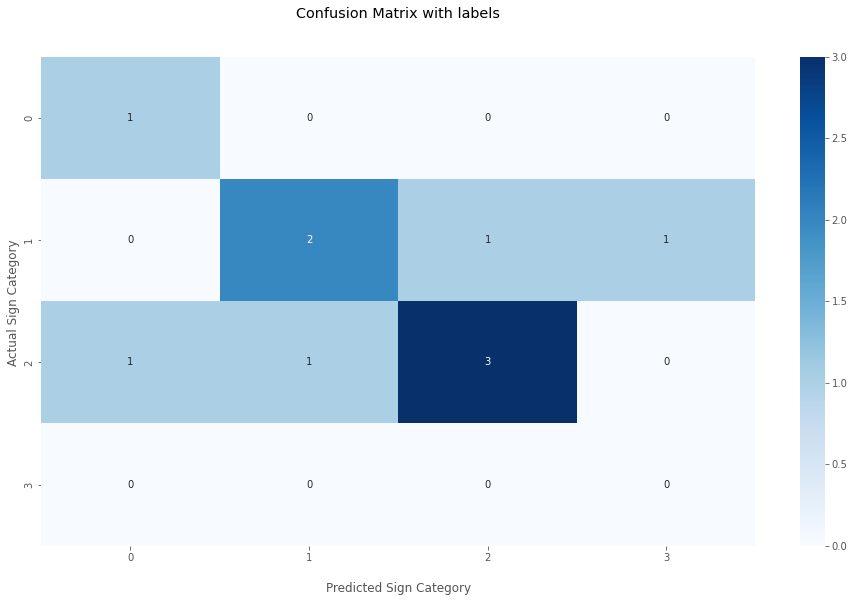

In [90]:
n_neighbors_PC10_10_10inst_verbs = 1
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.60


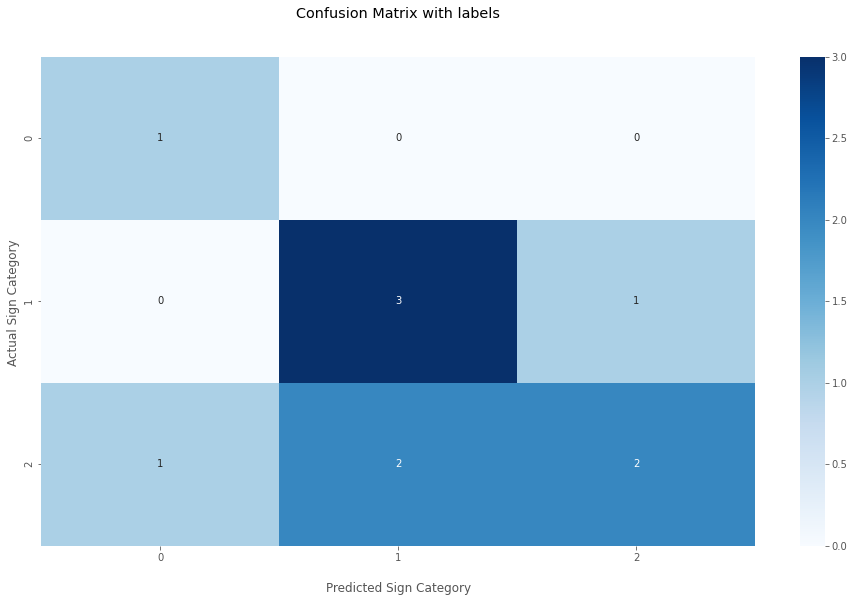

In [91]:
n_neighbors_PC10_10_10inst_verbs = 2
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.60


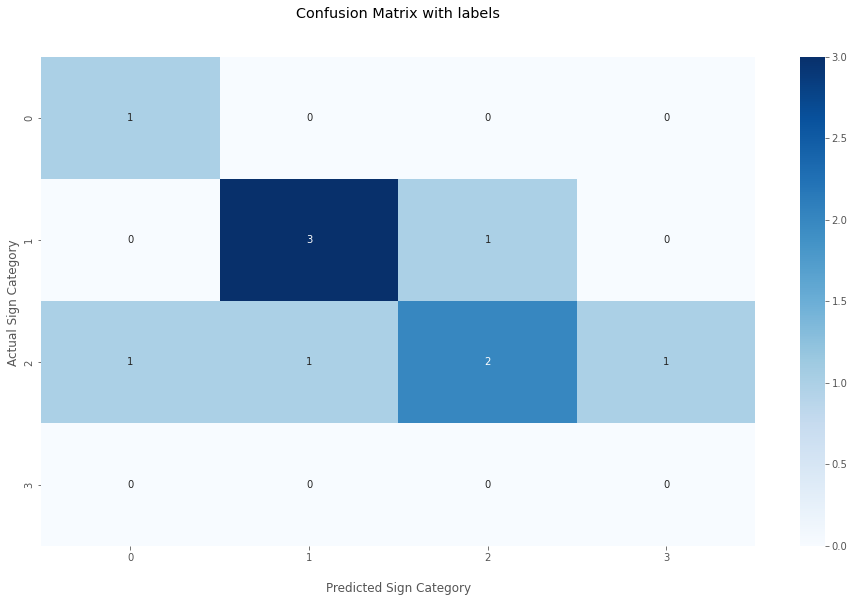

In [92]:
n_neighbors_PC10_10_10inst_verbs = 3
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.60


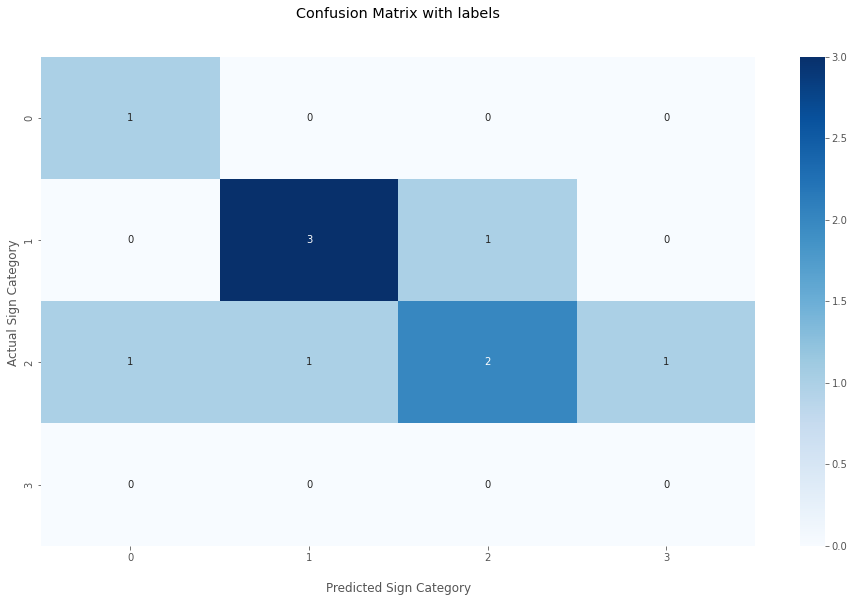

In [93]:
n_neighbors_PC10_10_10inst_verbs = 5
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()